## Visualize example images with annotations

In [17]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2 as cv2
#Set your DATASET DIR
DATASET_DIR = '../smartex_acquisition_ws/smartex_textile/'


In [18]:
coco=COCO(os.path.join(DATASET_DIR,'labels/smartex_annotations_cocostyle.json'))
print(coco.getImgIds())

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122]


[{'id': 2, 'width': 821, 'height': 320, 'file_name': '096cab534c_stack.png', 'license': 0, 'flickr_url': 'jumper boardeux tezenis', 'coco_url': '', 'date_captured': '2025-09-08T08:51:19Z'}]
(320, 821, 252)


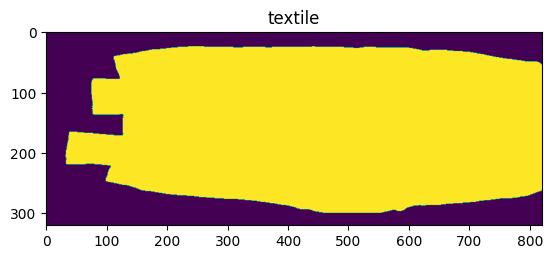

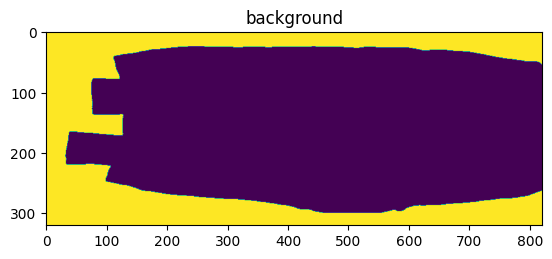

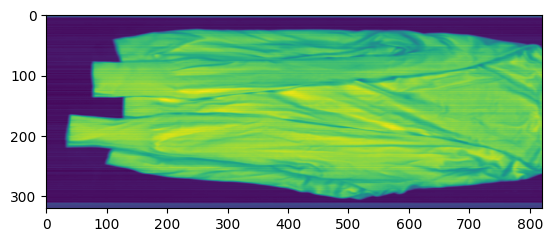

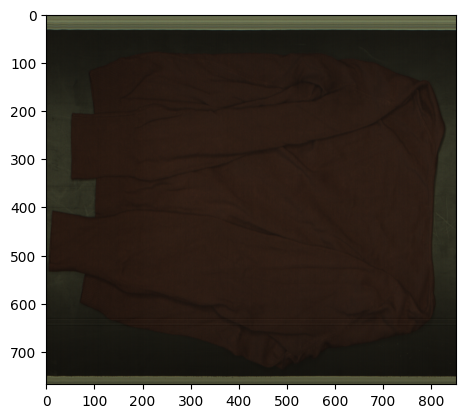

In [19]:
img_id =2
img = coco.loadImgs(img_id)
print(img)
file_name = img[0]['file_name'].split('.')[0].split('_')[0]
annIds = coco.getAnnIds(imgIds=img_id, catIds=[1,2,3], iscrowd=None)
anns = coco.loadAnns(annIds)
non_textile = [ann for ann in anns if ann['category_id']==3]
if(len(non_textile)>0):
    mask_nontextile = coco.annToMask(non_textile[0])
    plt.imshow(mask_nontextile)
    plt.title('non-textile')
    plt.figure()
ann_textile = [ann for ann in anns if ann['category_id']==2][0]
mask = coco.annToMask(ann_textile)
plt.imshow(mask)
plt.title('textile')
plt.figure()


ann_background = [ann for ann in anns if ann['category_id']==1][0]
mask = coco.annToMask(ann_background)
plt.imshow(mask)
plt.title('background')

plt.figure()
cube = np.load(os.path.join(DATASET_DIR,'data/hsi/%s.npy'%file_name))
plt.imshow(cube[:,:,120])
print(cube.shape)
plt.figure()
rgb = cv2.imread(os.path.join(DATASET_DIR,'data/rgb/%s.png'%file_name))

plt.imshow(cv2.cvtColor(rgb,cv2.COLOR_BGR2RGB))


## Statistics
This block calculates some statistics about the materials present in the dataset

🧵 Total pure material entries: 61


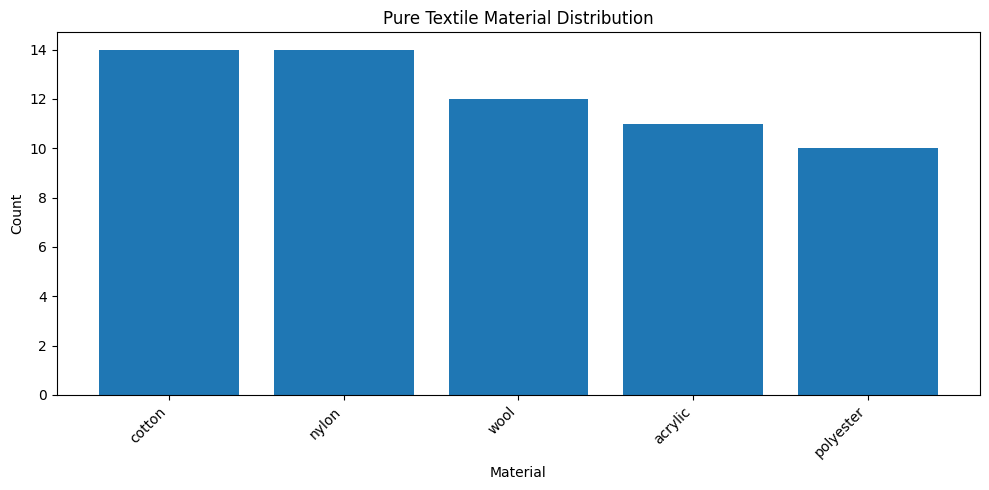

🧵 Total composite entries: 59


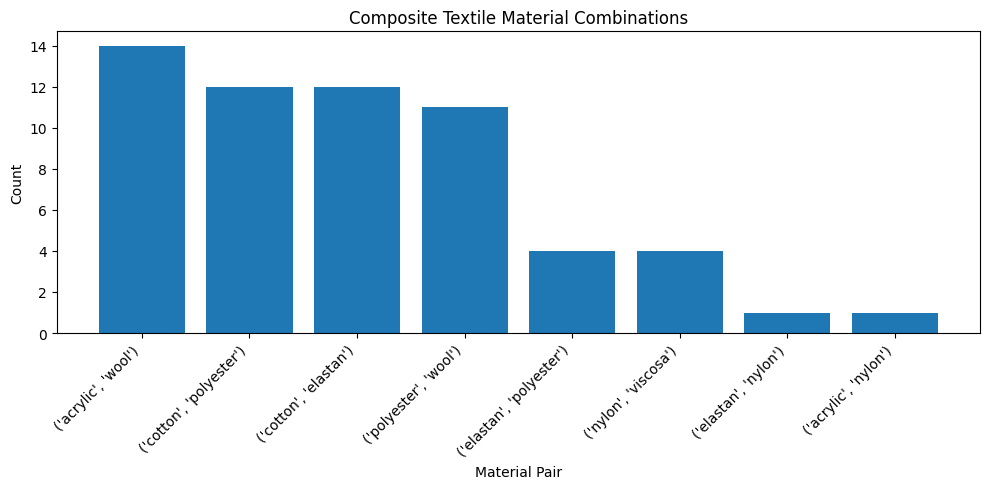

🧩 Number of unique images with non-textile elements: 17


In [22]:


import json
from collections import Counter
import matplotlib.pyplot as plt


def load_coco_annotations(path):
    with open(path, 'r') as f:
        return json.load(f)


def extract_textile_materials(coco_data):
    textile_cat_ids = {cat['id'] for cat in coco_data['categories'] if cat['name'] == 'textile'}
    textile_annotations = [ann for ann in coco_data['annotations'] if ann['category_id'] in textile_cat_ids]
    
    material_counts = Counter()
    composite_counts = Counter()
    
    for ann in textile_annotations:
        
        
        materials = ann.get("attributes", {})
        materials = {k: v for k, v in materials.items() if v > 0}
        
        if len(materials) == 1:
            mat = list(materials.keys())[0]
            material_counts[mat] += 1
        elif len(materials) == 2:
            key = tuple(sorted(materials.keys()))
            composite_counts[key] += 1
        
    
    return material_counts, composite_counts


def count_non_textile_elements(coco_data):
    non_textile_cat_ids = {cat['id'] for cat in coco_data['categories'] if cat['name'] == 'non-textile'}
    non_textile_annotations = [ann for ann in coco_data['annotations'] if ann['category_id'] in non_textile_cat_ids]

    image_ids = {ann["image_id"] for ann in non_textile_annotations}
    return len(image_ids)


def plot_bar_chart(counter, title, xlabel, ylabel, rotation=45):
    keys = list(counter.keys())
    values = [counter[k] for k in keys]

    plt.figure(figsize=(10, 5))
    plt.bar(range(len(keys)), values)
    plt.xticks(range(len(keys)), [str(k) for k in keys], rotation=rotation, ha='right')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()


# Main function for Jupyter use
annotation_path = os.path.join(DATASET_DIR,'labels/smartex_annotations_cocostyle.json')
coco_data = load_coco_annotations(annotation_path)

pure_counts, composite_counts = extract_textile_materials(coco_data)
non_textile_count = count_non_textile_elements(coco_data)
pure_sorted = {k: v for k, v in sorted(pure_counts.items(), key=lambda item: item[1],reverse=True)}
non_textile_count_sorted = {k: v for k, v in sorted(composite_counts.items(), key=lambda item: item[1],reverse=True)}
print(f"🧵 Total pure material entries: {sum(pure_sorted.values())}")
plot_bar_chart(pure_sorted, "Pure Textile Material Distribution", "Material", "Count")

print(f"🧵 Total composite entries: {sum(non_textile_count_sorted.values())}")
plot_bar_chart(non_textile_count_sorted, "Composite Textile Material Combinations", "Material Pair", "Count")

print(f"🧩 Number of unique images with non-textile elements: {non_textile_count}")
